<a href="https://colab.research.google.com/github/RavindrapalRathore/task_guvi/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
# conda install -c conda-forge/label/gcc7 missing

#Importing both tables 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_user= pd.read_csv('/content/drive/MyDrive/dataset/task5/takehome_users.csv',encoding='ISO-8859-1')
print(df_user.shape)
df_user.head()

(12000, 10)


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
df_user.nunique()
type(df_user)

pandas.core.frame.DataFrame

In [9]:
df_usage= pd.read_csv('/content/drive/MyDrive/dataset/task5/takehome_user_engagement.csv')
print(df_usage.shape)
df_usage.head()

(207917, 3)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
#unique values of each column 
df_usage.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

In [11]:
df_usage.visited.value_counts()

1    207917
Name: visited, dtype: int64

In [12]:
#visted column is not necessary since every column shows the details of the person who has visited 
#hens dropping visited column 
df_usage.drop('visited',axis=1,inplace=True)
df_usage.head()

,time_stamp,user_id
0,2014-04-22 03:53:30,1
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2
3,2013-12-09 03:45:04,2
4,2013-12-25 03:45:04,2


In [13]:
df_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ MB


In [14]:
#converting the object type of time_stamp in to date time 
df_usage['time_stamp']= pd.to_datetime(df_usage['time_stamp'], format='%Y-%m-%d %H:%M:%S')
df_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 MB


In [15]:
df_usage=df_usage.sort_values(by="time_stamp")
df_usage

,time_stamp,user_id
178140,2012-05-31 08:20:06,10012
59486,2012-05-31 15:47:36,3428
175638,2012-05-31 17:19:37,9899
26821,2012-05-31 21:58:33,1693
109716,2012-06-01 00:17:30,6102
...,...,...
84316,2014-06-04 23:32:13,4625
162633,2014-06-04 23:34:04,9325
168409,2014-06-04 23:46:31,9558
6053,2014-06-04 23:56:26,341


In [16]:
from datetime import datetime
df_usage["time_stamp"]=df_usage["time_stamp"].dt.date
df_usage['time_stamp']= pd.to_datetime(df_usage['time_stamp'], format='%Y-%m-%d')
df_usage=df_usage.reset_index(drop=True)


In [17]:
def find_if_adopted (df):
    from datetime import timedelta
    df1=df.drop_duplicates(subset='time_stamp')
    diff_3day=df1['time_stamp'].diff(periods=2)
    return any(diff_3day <= timedelta(days=7))   

In [18]:
adopt=df_usage.groupby('user_id').apply(find_if_adopted)

In [19]:
df_usage=df_usage.drop("time_stamp",axis=1)
df_usage=df_usage.drop_duplicates(subset='user_id')
df_usage=df_usage.reset_index(drop=True)
adopt=np.array(adopt)
df_2=pd.DataFrame({"adopted_user":adopt})
df_usage['adopted_user']=df_2['adopted_user']
df_usage['adopted_user']=df_usage['adopted_user'].astype(int)
df_usage

,user_id,adopted_user
0,10012,0
1,3428,1
2,9899,0
3,1693,0
4,6102,0
...,...,...
8818,8499,0
8819,9879,0
8820,4641,0
8821,6299,0


In [20]:
df_usage['adopted_user'].value_counts()
#so we have 1656 adopted user form 8823 unique users

0    7167
1    1656
Name: adopted_user, dtype: int64

In [21]:
# df_user=df_user.rename(columns={"object_id":"user_id"})
df_user=df_user.set_index('object_id')
df_user.index.name='user_id'

In [22]:
df_usage=df_usage.set_index('user_id')
df_usage.tail(20)

,adopted_user
user_id,
4669,0
7446,0
5333,0
9482,0
11315,0
219,0
5634,0
8588,0
8964,0


In [23]:
#first changed to index of both the dataset to user id so that they allign while concating 
df_data= pd.concat([df_user,df_usage], axis=1, join='inner')

In [24]:
df_data.loc[11504]

creation_time                           2014-05-30 17:44:48
name                                        Gomes Gabrielly
email                         GabriellyCostaGomes@gmail.com
creation_source                                  ORG_INVITE
last_session_creation_time                     1401644688.0
opted_in_to_mailing_list                                  0
enabled_for_marketing_drip                                0
org_id                                                    1
invited_by_user_id                                   4733.0
adopted_user                                              1
Name: 11504, dtype: object

In [25]:
print(df_usage.shape)
print(df_user.shape)
print(df_data.shape)

(8823, 1)
(12000, 9)
(8823, 10)


In [26]:
#The user id's which invited other adotped user ids .
df_data[df_data['adopted_user']==1].invited_by_user_id.value_counts().head()

4612.0    5
8925.0    4
2967.0    3
6374.0    3
78.0      3
Name: invited_by_user_id, dtype: int64

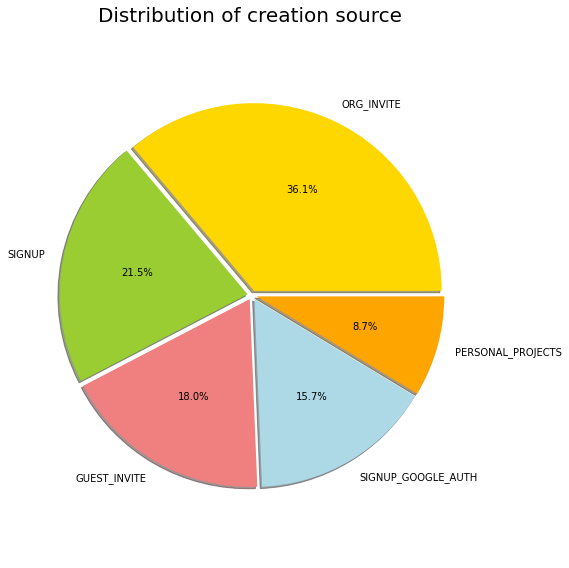

In [27]:
df_source = df_data.creation_source.value_counts()
df_source = df_source.reset_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
explode = (0.05, 0.05, 0.05,0.05,0.05)
colors = ['gold', 'yellowgreen', 'lightcoral','lightblue','orange']
# Put parameter values
plt.pie(
    df_source['creation_source'],
    labels=df_source['index'],
    shadow=True,
    startangle=0,
    autopct='%1.1f%%',
    radius=2,
    explode=explode,
    colors=colors
    )

# Add title
plt.title('Distribution of creation source',fontsize=20)
plt.axis('equal')

# Display plot
plt.tight_layout()
plt.show()

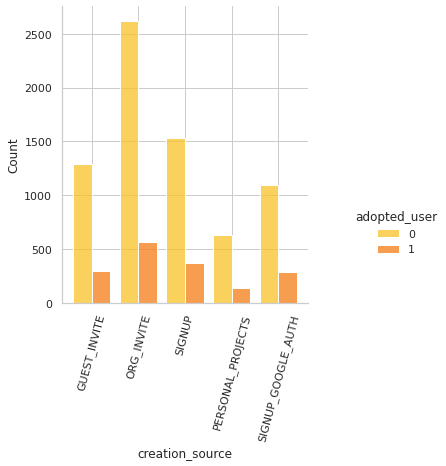

In [28]:
sns.set_theme(style='whitegrid',palette='inferno_r')
ax=sns.displot(df_data, x="creation_source", hue="adopted_user", multiple="dodge",shrink=.8)
ax=plt.xticks(rotation=75)

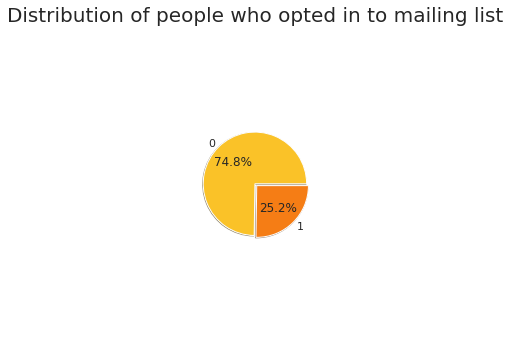

In [29]:
df_optmail = df_data.opted_in_to_mailing_list.value_counts()
df_source = df_optmail.reset_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
explode = (0.05,0.05)

# Put parameter values
plt.pie(
    df_source['opted_in_to_mailing_list'],
    labels=df_source['index'],
    shadow=True,
    startangle=0,
    autopct='%1.1f%%',
    radius=2,
    explode=explode
    )

# Add title
plt.title('Distribution of people who opted in to mailing list',fontsize=20)
plt.axis('equal')

# Display plot
plt.tight_layout()
plt.show()

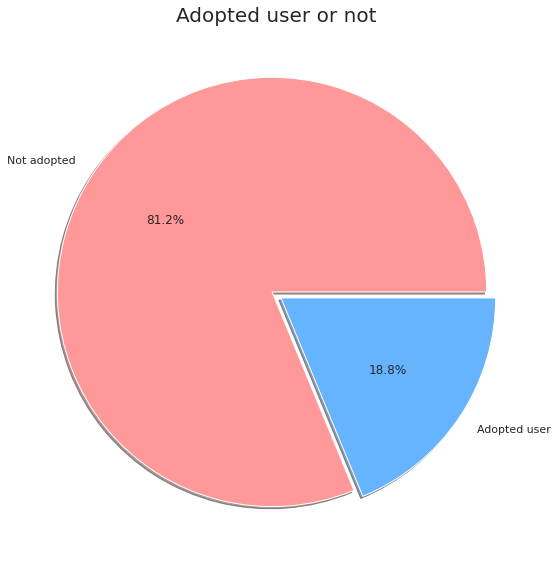

In [30]:
df_adopt = df_data.adopted_user.value_counts()
df_source = df_adopt.reset_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
explode = (0.05,0.05)
labels =['Not adopted','Adopted user']
colors = ['#ff9999','#66b3ff']
# Put parameter values
plt.pie(
    df_source['adopted_user'],
    labels=labels,
    shadow=True,
    startangle=0,
    autopct='%1.1f%%',
    radius=2,
    explode=explode,
    colors=colors
    )

# Add title
plt.title('Adopted user or not',fontsize=20)
plt.axis('equal')

# Display plot
plt.tight_layout()
plt.show()

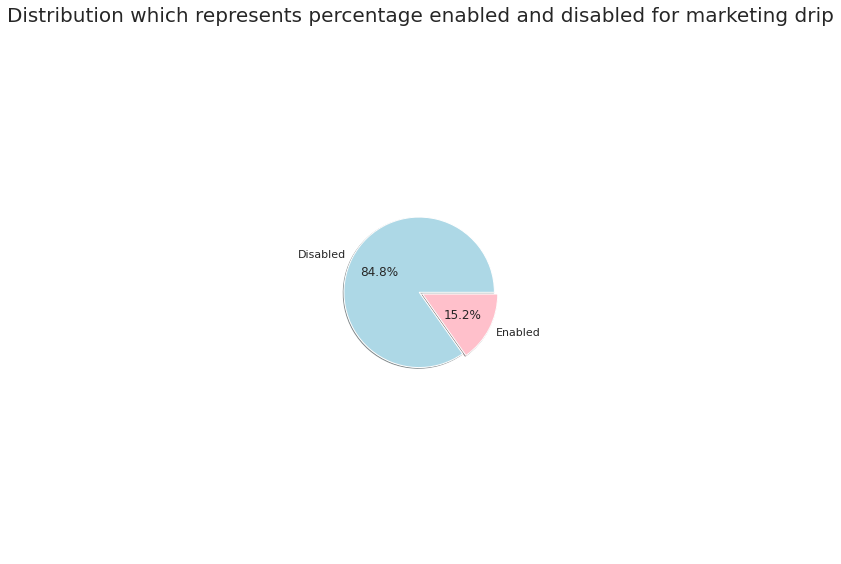

In [31]:
df_drip = df_data.enabled_for_marketing_drip.value_counts()
df_drip = df_drip.reset_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
explode = (0.05, 0.05)
colors = ['lightblue','pink']
labels =['Disabled','Enabled']

# Put parameter values
plt.pie(
    df_drip['enabled_for_marketing_drip'],
    labels=labels,
    shadow=True,
    startangle=0,
    autopct='%1.1f%%',
    radius=2,
    explode=explode,
    colors=colors
    )

# Add title
plt.title('Distribution which represents percentage enabled and disabled for marketing drip',fontsize=20)
plt.axis('equal')

# Display plot
plt.tight_layout()
plt.show()

In [32]:
from datetime import datetime
# convert unix timestamp to datetime
df_data['last_session_creation_time'] = df_data['last_session_creation_time'].apply(
    lambda x: datetime.strptime(str(datetime.fromtimestamp(float(int(x)))), '%Y-%m-%d %H:%M:%S'))
df_data['creation_time'] = df_data['creation_time'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

In [33]:
df_data['history'] = df_data['last_session_creation_time'] - df_data['creation_time']
df_data['history'] = df_data['history'].dt.days
latest = max(df_data['creation_time'])
df_data['account_age'] = latest - df_data['creation_time']
df_data['account_age'] = df_data['account_age'].dt.days
df_data = df_data.drop(['last_session_creation_time','creation_time' ], axis=1)
df_data.head()

,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,history,account_age
user_id,,,,,,,,,,
1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0,0,38
2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,0,136,196
3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0,0,437
4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,0,1,374
5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,0,5,498


In [34]:
data=df_data.drop(['name','email'],axis=1)
data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,history,account_age
user_id,,,,,,,,
1,GUEST_INVITE,1,0,11,10803.0,0,0,38
2,ORG_INVITE,0,0,1,316.0,0,136,196
3,ORG_INVITE,0,0,94,1525.0,0,0,437
4,GUEST_INVITE,0,0,1,5151.0,0,1,374
5,GUEST_INVITE,0,0,193,5240.0,0,5,498


In [35]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
data['creation_source']=le.fit_transform(data['creation_source'])

In [36]:
data.creation_source.unique()

array([0, 1, 3, 2, 4])

In [37]:
data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,history,account_age
user_id,,,,,,,,
1,0,1,0,11,10803.0,0,0,38
2,1,0,0,1,316.0,0,136,196
3,1,0,0,94,1525.0,0,0,437
4,0,0,0,1,5151.0,0,1,374
5,0,0,0,193,5240.0,0,5,498


In [39]:
#finding if feature history is related  to adopted user using t-test

import scipy.stats as stats 
history=data["history"]
adopted=data["adopted_user"]
stats.ttest_ind(a=history,b=adopted,equal_var=True)

Ttest_indResult(statistic=38.461895305392744, pvalue=0.0)

pvalue is less tha 0.05 which means I have enough evidance to reject null hypothysis 
ie: we can conclude that history and adopted feature is depended 

In [40]:
#finding dependency btwn creation source and adopted_user using chi-square test
import scipy.stats as st
tab = pd.crosstab(data['creation_source'],data['adopted_user'])
# tab = tab.T
print(tab)
 
'''chi2 : float
The test statistic.
 
p : float
The p-value of the test
 
dof : int
Degrees of freedom'''
 
st.chi2_contingency(tab)

adopted_user        0    1
creation_source           
0                1289  299
1                2623  565
2                 628  136
3                1529  369
4                1098  287


(6.790277356968889,
 0.14739494501482908,
 4,
 array([[1289.94627678,  298.05372322],
        [2589.64025842,  598.35974158],
        [ 620.60387623,  143.39612377],
        [1541.76198572,  356.23801428],
        [1125.04760286,  259.95239714]]))

In [41]:
data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,history,account_age
user_id,,,,,,,,
1,0,1,0,11,10803.0,0,0,38
2,1,0,0,1,316.0,0,136,196
3,1,0,0,94,1525.0,0,0,437
4,0,0,0,1,5151.0,0,1,374
5,0,0,0,193,5240.0,0,5,498


In [42]:
data.drop("invited_by_user_id",axis=1,inplace=True)

In [43]:
data.shape

(8823, 7)

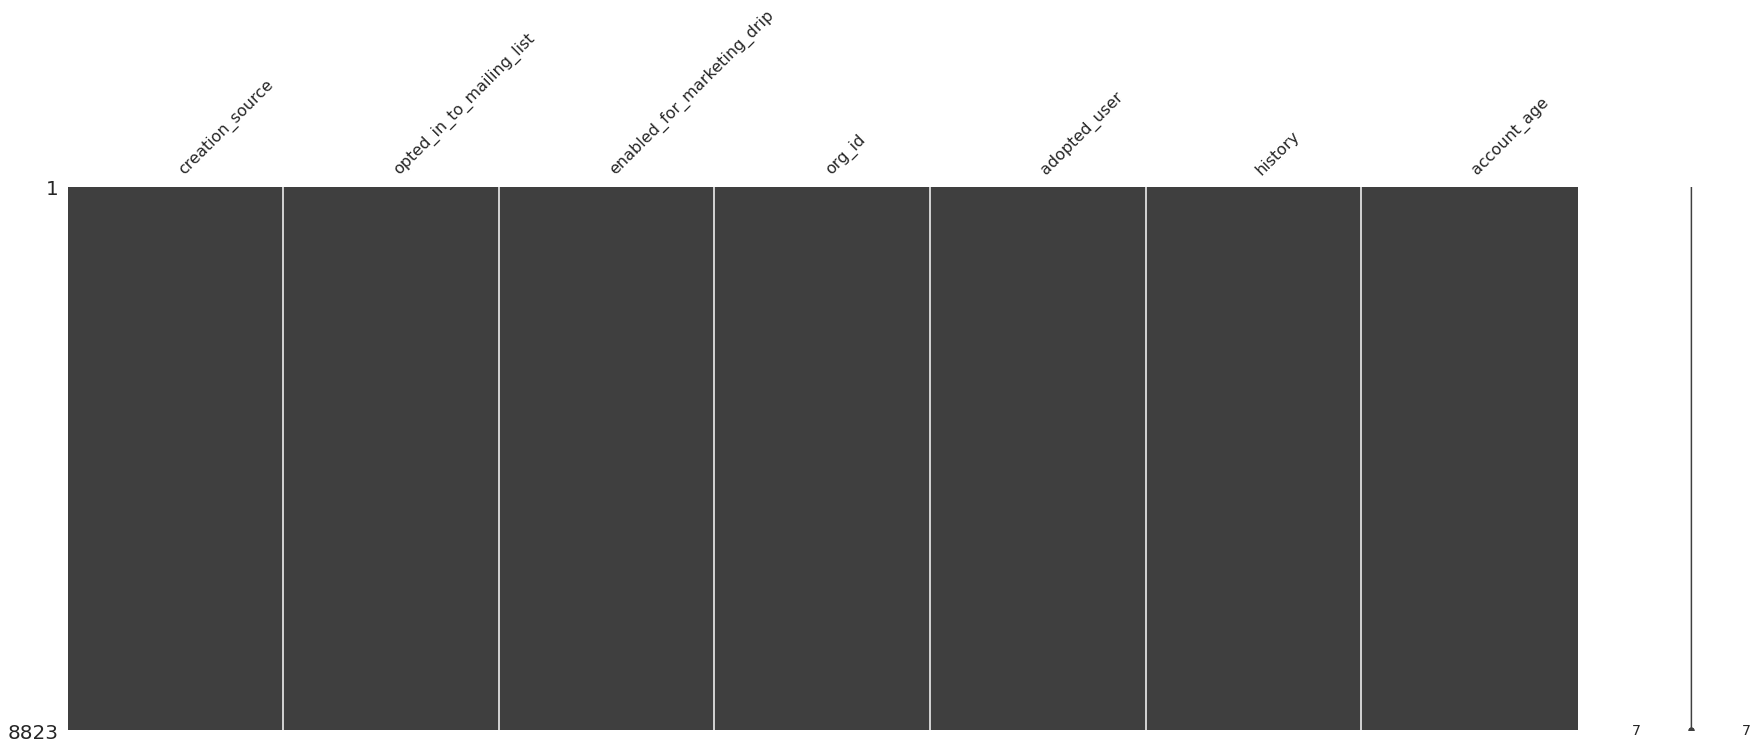

In [44]:
import missingno 
missingno.matrix(data,figsize=(30,10))

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   creation_source             8823 non-null   int64
 1   opted_in_to_mailing_list    8823 non-null   int64
 2   enabled_for_marketing_drip  8823 non-null   int64
 3   org_id                      8823 non-null   int64
 4   adopted_user                8823 non-null   int64
 5   history                     8823 non-null   int64
 6   account_age                 8823 non-null   int64
dtypes: int64(7)
memory usage: 809.5 KB


LogisticRegression

In [46]:
X=data.iloc[:,[0,1,2,3,5,6]].values
Y=list(data["adopted_user"])

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=3)

In [48]:

from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred = model.predict(x_test)

In [50]:
#this is for referance perpose only ,not mandatory to do for the model
df= pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.sample(5)

,Actual,Predicted
1176,1,0
234,0,0
2286,0,0
223,0,0
2281,1,0


In [51]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.18058179070646013
Mean Squared Error: 0.18058179070646013
Root Mean Squared Error: 0.42494916249648046


In [52]:
model.coef_

array([[ 4.04061393e-02,  6.42835340e-02,  4.77997589e-02,
         6.57467950e-05, -1.21174845e-04, -1.42458630e-04]])

In [53]:
model.intercept_

array([-1.50159415])